# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


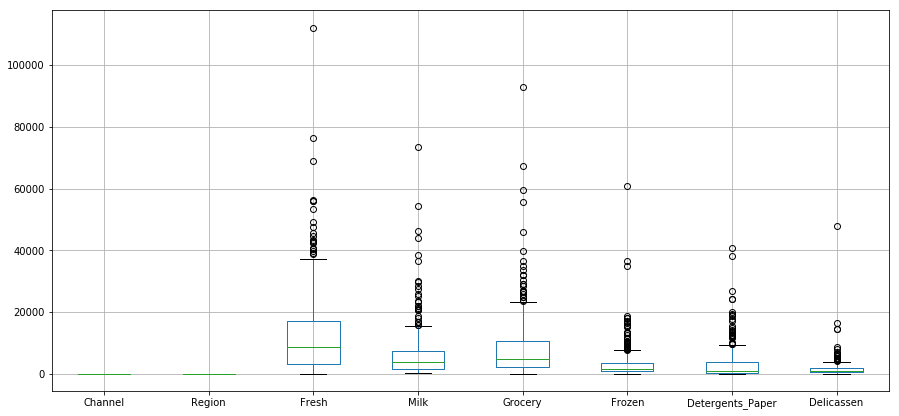

In [6]:
customers.boxplot(figsize=(15,7));

In [ ]:
# Your observations here
#Existen algunos outliers que necesitamos quitar

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here
#Al quitar todos los outliers, se pierde informacion, por tal motivo, no los voy a quitar

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customers_scale = StandardScaler().fit_transform(customers)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [11]:
# Your code here:
from sklearn.cluster import KMeans
customers['labels'] = KMeans().fit(customers).labels_

Count the values in `labels`.

In [9]:
# Your code here:
len(customers['labels'])

440

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:
# Your code here
from sklearn.cluster import DBSCAN
customers['labels_DBSCAN'] = DBSCAN(eps=0.5).fit(customers_scale).labels_

Count the values in `labels_DBSCAN`.

In [13]:
# Your code here
len(customers['labels_DBSCAN'])

440

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

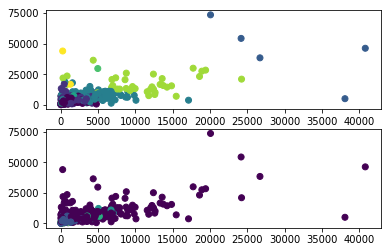

In [17]:
# Your code here:
f, ax = plt.subplots(2)
ax[0].scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels']);
ax[1].scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN']);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

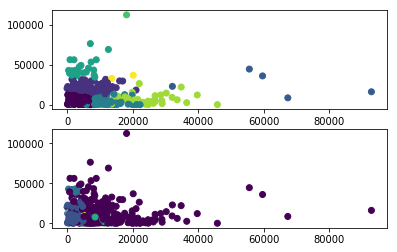

In [18]:
# Your code here:
f, ax = plt.subplots(2)
ax[0].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels']);
ax[1].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN']);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

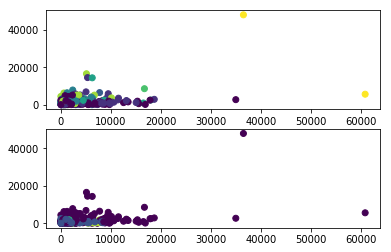

In [19]:
# Your code here:
f, ax = plt.subplots(2)
ax[0].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels']);
ax[1].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN']);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [20]:
# Your code here:
customers.groupby(['labels', 'labels_DBSCAN']).mean()

Channel    Region          Fresh          Milk  \
labels labels_DBSCAN                                                    
0      -1             1.160000  2.260000    6432.180000   3707.360000   
        0             2.000000  3.000000   10210.000000   3362.750000   
        1             1.000000  3.000000    6184.740000   1868.310000   
        5             1.000000  1.000000    7247.000000   1754.750000   
        6             1.000000  1.000000    6823.000000   1943.000000   
        7             1.000000  2.000000    7494.600000   1537.600000   
1      -1             1.303030  2.454545   22239.969697   4994.924242   
        0             2.000000  3.000000   16165.000000   4230.000000   
        1             1.000000  3.000000   19983.500000   1689.714286   
        5             1.000000  1.000000   16746.833333   1744.166667   
2      -1             2.000000  2.800000   25603.000000  43460.600000   
3      -1             1.710526  2.539474    4574.118421   7745.960526   
        1             1.000000  3.000000    4367.500000   3987.000000   
        3             2.000000  3.000000    2357.200000  10224.800000   
        4             2.000000  3.000000    3068.142857   6095.857143   
4      -1             1.117647  2.647059   48009.588235   4032.058824   
        2             1.000000  3.000000   41446.600000   1421.200000   
5      -1             1.000000  3.000000  112151.000000  29627.000000   
6      -1             1.947368  2.368421    6264.894737  17153.578947   
7      -1             1.000000  2.500000   34782.000000  30367.000000   

                           Grocery        Frozen  Detergents_Paper  \
labels labels_DBSCAN                                                 
0      -1              4036.340000   5028.640000       1027.460000   
        0              6512.500000    850.000000       3450.500000   
        1              2332.210000   1961.780000        464.510000   
        5              2267.375000   1272.812500        339.750000   
        6              2372.666667   6780.333333        386.500000   
        7              3383.000000   2575.400000        227.400000   
1      -1              6731.954545   4499.666667       1474.606061   
        0              7595.000000    201.000000       4003.000000   
        1              2351.357143   2853.785714        455.214286   
        5              1879.833333   2154.166667        318.500000   
2      -1             61472.200000   2636.000000      29974.200000   
3      -1             11742.276316   1339.763158       5033.578947   
        1              8000.000000    501.000000       2679.000000   
        3             11862.800000    609.600000       5780.000000   
        4             10355.000000    994.000000       4675.571429   
4      -1              5554.941176   6418.647059        914.235294   
        2              2167.600000   1276.400000        416.200000   
5      -1             18148.000000  16745.000000       4948.000000   
6      -1             24637.763158   2132.868421      10733.236842   
7      -1             16898.000000  48701.500000        755.500000   

                        Delicassen  
labels labels_DBSCAN                
0      -1              1389.480000  
        0               308.500000  
        1               735.120000  
        5               584.875000  
        6               613.666667  
        7               941.000000  
1      -1              2160.000000  
        0                57.000000  
        1               776.178571  
        5               893.500000  
2      -1              2708.800000  
3      -1              1414.842105  
        1               604.000000  
        3               572.800000  
        4              1826.428571  
4      -1              2547.941176  
        2               784.800000  
5      -1              8550.000000  
6      -1              2420.973684  
7      -1             26776.000000

Which algorithm appears to perform better?

In [ ]:
# Your observations here
#labels_DBSCAN

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here